DESAFIO INDICIUM - CIENTISTA DE DADOS

**1.Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import statsmodels.api as sm
import numpy as np
import re

In [44]:
precificacao = pd.read_csv('teste_indicium_precificacao.csv')
df = pd.DataFrame (precificacao)
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**EDA Análise Exploratória dos Dados**

Esta etapa tem por objetivo ter um entendimento de como os dados estão estruturados.

In [45]:
##1. Visão Geral do Dataset
#Tipos de dados, valores ausentes e estatísticas descritivas do conjunto de dados.

print(df.shape)
print(df.dtypes)

(48894, 16)
id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object


In [46]:
print(df.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [47]:
#imputar valores aos registros NaN, levando a modelos precisos. 
# a coluna last_review tem datas, aparentemente não agrega muito valor à análise, 
# então podemos descartar essa coluna também e imputaremos os valores nulos em reviews_por_mes com zero

#Substituindo valores NaN por 0 na coluna reviews_por_mes
df['reviews_por_mes'].fillna(0, inplace=True)
print(df.isnull().sum())


id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


/var/folders/xn/9klf1g9j77q886spjbph8q7w0000gn/T/ipykernel_17031/4218829126.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_por_mes'].fillna(0, inplace=True)


In [48]:
df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.090928,112.776169
std,240.156625,20.510741,44.550991,1.597294,131.618692
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


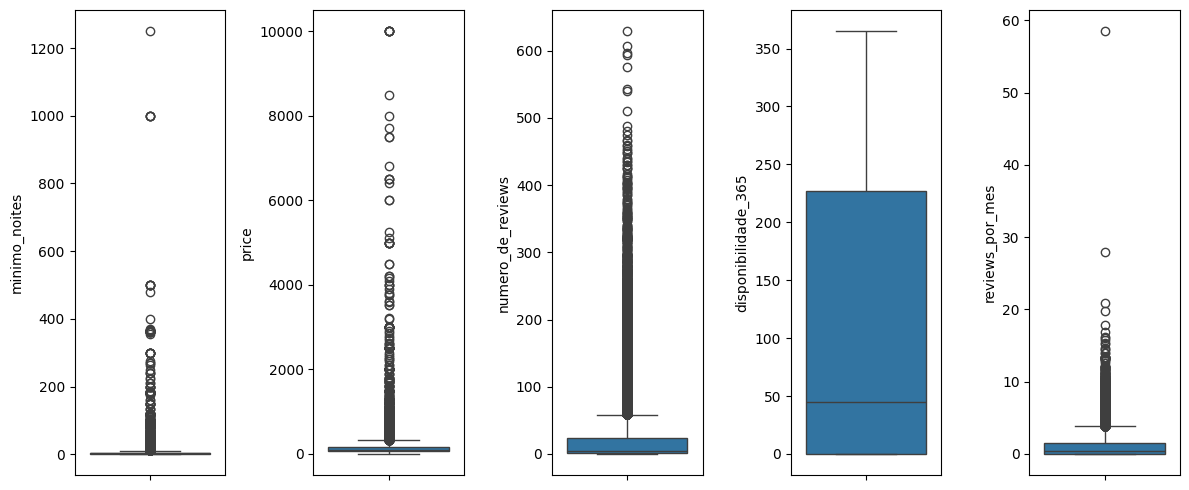

In [49]:
#Boxplot 

fig, axes = plt.subplots(1,5, figsize=(12, 5))
sns.boxplot(y=df['minimo_noites'], ax=axes[0])
sns.boxplot(y=df['price'], ax=axes[1])
sns.boxplot(y=df['numero_de_reviews'], ax=axes[2])
sns.boxplot(y=df['disponibilidade_365'], ax=axes[3])
sns.boxplot(y=df['reviews_por_mes'], ax=axes[4])

plt.tight_layout()

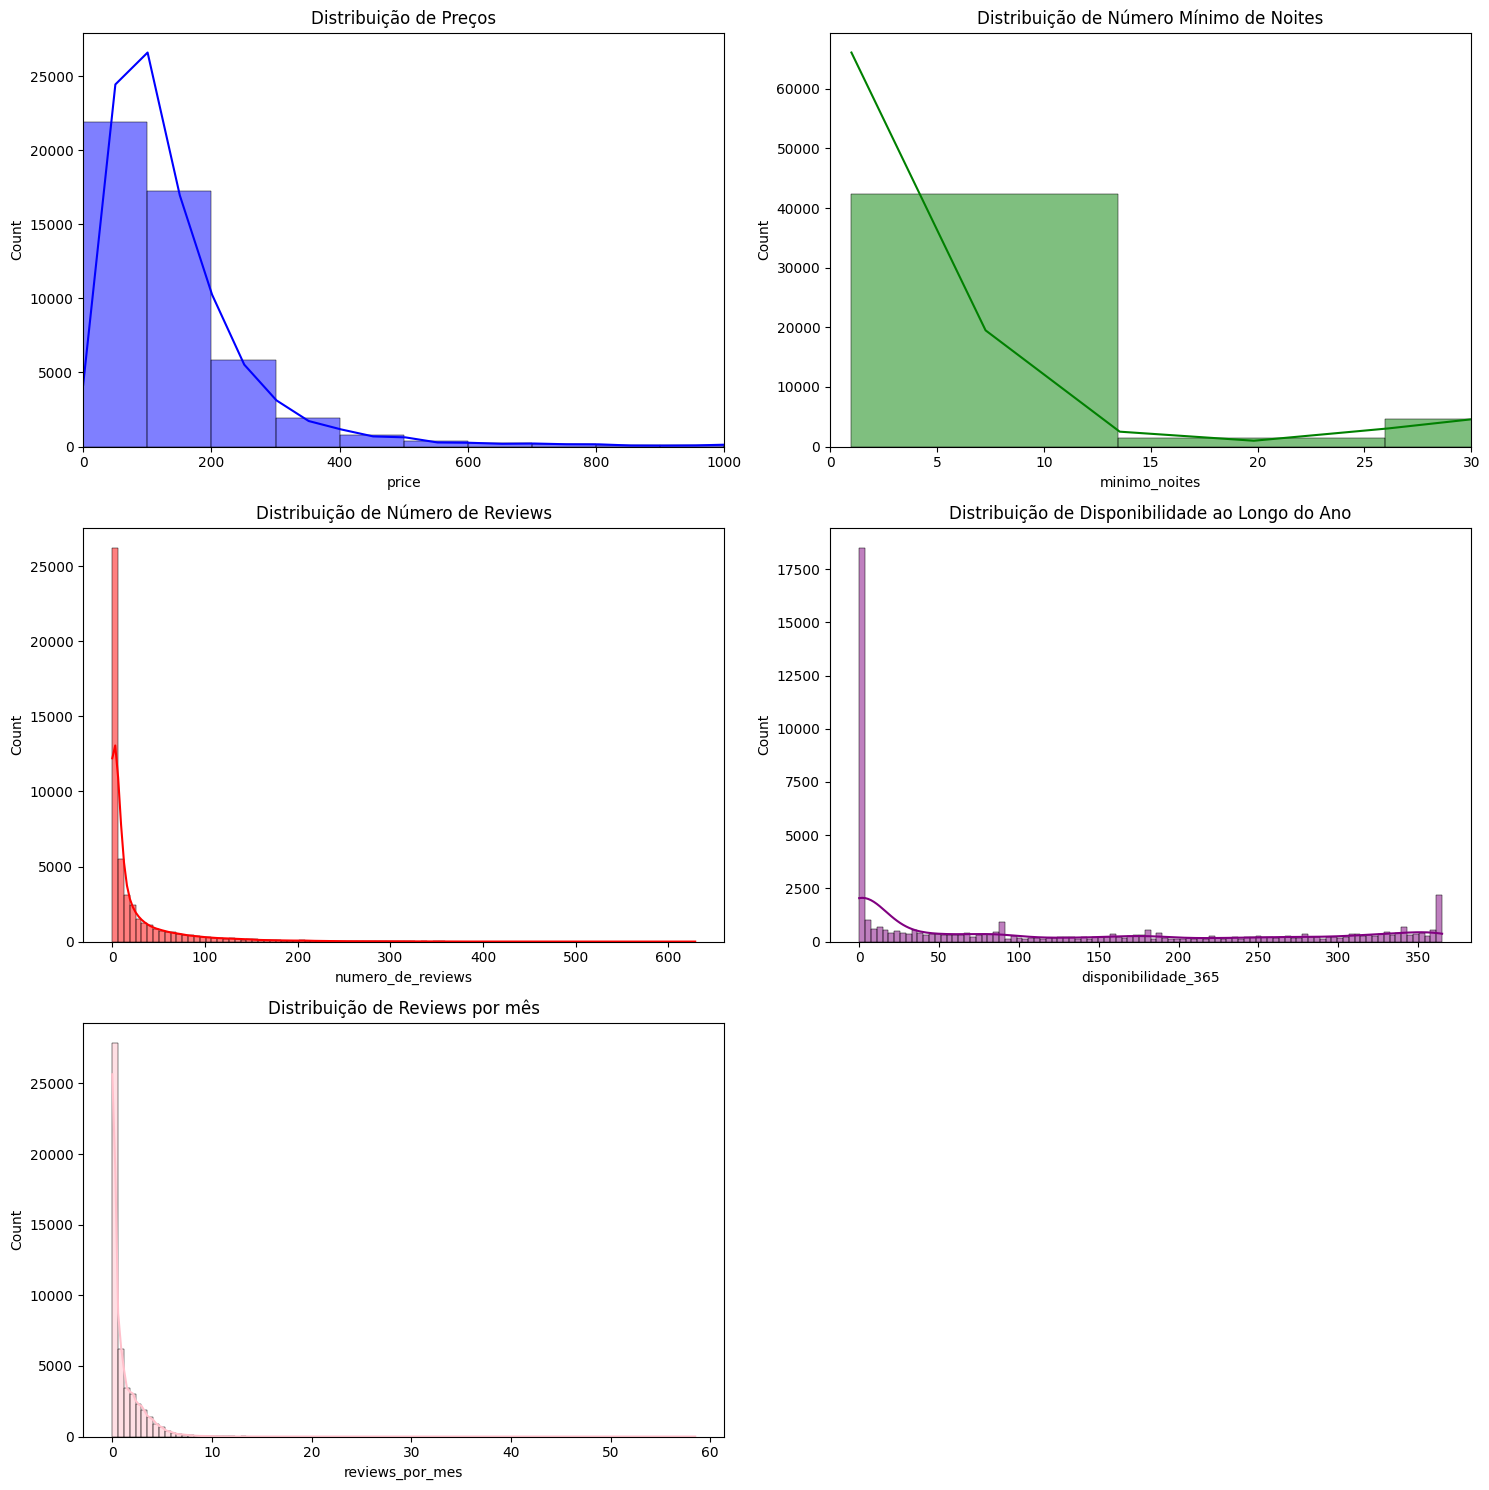

In [50]:
##1. Visão Geral do Dataset
#Distribuição de variáveis
# Histograma
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

sns.histplot(df['price'], bins=100, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Distribuição de Preços')
axes[0, 0].set_xlim(0, 1000) 

sns.histplot(df['minimo_noites'], bins=100, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Distribuição de Número Mínimo de Noites')
axes[0, 1].set_xlim(0, 30) 

sns.histplot(df['numero_de_reviews'], bins=100, ax=axes[1, 0], kde=True, color='red')
axes[1, 0].set_title('Distribuição de Número de Reviews')

sns.histplot(df['disponibilidade_365'], bins=100, ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('Distribuição de Disponibilidade ao Longo do Ano')

sns.histplot(df['reviews_por_mes'], bins=100, ax=axes[2, 0], kde=True, color='pink')
axes[2, 0].set_title('Distribuição de Reviews por mês')

# Removendo o subplot não utilizado
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


**Considerações:**

Visão Geral do Dataset

O dataset possui 48894 linhas e 16 colunas. 
O dataset possui uma combinação de tipos de dados: int, float e object (strings). 

As colunas nome e host_name têm alguns valores ausentes, mas são poucos. A coluna ultima_review e reviews_por_mes têm um número significativo de valores ausentes, o que pode ser devido a propriedades sem reviews.

O preço varia significativamente, com uma faixa de  0 a 10.000 (média = $152.72) sugerindo a presença de outliers com preços muito altos. A distribuição de preços é fortemente inclinada à direita, com a maioria dos aluguéis custando menos de $200 por noite. 

O número mínimo de noites também varia bastante, de 1 a 1.250 noites. A maioria dos aluguéis exige um número mínimo de noites bastante baixo, geralmente menos de 5 noites. Existem alguns outliers com requisitos de estadia muito longos. 


O número de reviews e a disponibilidade ao longo do ano apresentam grande variação, o que pode indicar diferenças significativas na popularidade e ocupação das propriedades.
Muitas propriedades têm poucas ou nenhuma review, enquanto algumas têm muitas, indicando variações na popularidade ou na frequência de aluguel. A disponibilidade varia amplamente, com muitas propriedades disponíveis por menos de 100 dias ao ano e outras disponíveis o ano todo.


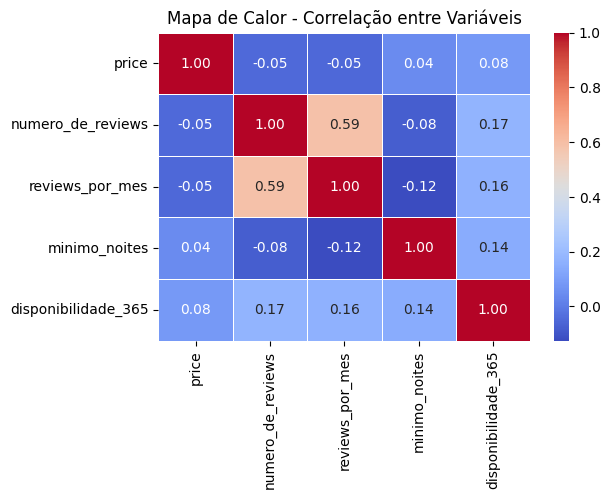

In [51]:
##2. Relações entre Variáveis
#Análise das correlações entre algumas das principais variáveis numéricas

correlacao = df[['price', 'numero_de_reviews', 'reviews_por_mes', 'minimo_noites', 'disponibilidade_365']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

**Relações entre Variáveis**

A princípio não há correlação forte entre as variáveis. Seguem algumas considerações:

Preço e Número Mínimo de Noites: Existe uma correlação muito baixa entre o preço e o número mínimo de noites, sugerindo que o preço não aumenta significativamente com o aumento do número mínimo de noites exigido. 

Preço e Número de Reviews: A correlação entre preço e número de reviews é negativa e fraca. Isso pode indicar que imóveis mais caros podem ser menos acessíveis para a maioria dos inquilinos, resultando em menos aluguéis e, por consequência, menos reviews, ou usuários da plataforma podem preferir alugar imóveis mais baratos, o que leva a um maior número de reviews nesses imóveis devido à maior rotatividade, ou ainda menor necessidade de reviews em imóveis de alto valor pois esse público não é influenciado por reviews. 

Preço e Disponibilidade ao Longo do Ano: A correlação é praticamente nula, indicando que o preço não é um fator determinante na disponibilidade anual da propriedade. 

Número de Reviews e Disponibilidade ao Longo do Ano: Esta correlação positiva, embora ainda fraca, indica que imóveis com mais reviews tendem a ter uma ligeiramente maior disponibilidade ao longo do ano. Isso pode indicar que uma maior quantidade de reviews pode aumentar a visibilidade e a atratividade do imóvel, levando a uma maior demanda e, por consequência, a uma maior disponibilidade para ser alugado ou imóveis que oferecem uma boa experiência podem receber mais reviews e, ao mesmo tempo, serem oferecidos com mais frequência ao longo do ano.

2. Responda também às seguintes perguntas:
Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra? O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço? Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [52]:
#Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

#Análise geográfica
 
loc_price = df.groupby(['bairro_group'])['price'].mean().reset_index()
loc_price = loc_price.sort_values(by='price', ascending=False)

loc_reviews = df.groupby(['bairro_group'])['numero_de_reviews'].sum().reset_index()
loc_reviews = loc_reviews.sort_values(by='numero_de_reviews', ascending=False)

resultado_unificado = loc_price.merge(loc_reviews, on='bairro_group')
resultado_unificado.columns = ['bairro_group', 'preco_medio', 'soma_reviews']
resultado_unificado

,bairro_group,preco_medio,soma_reviews
0,Manhattan,196.875814,454569
1,Brooklyn,124.381983,486565
2,Staten Island,114.812332,11541
3,Queens,99.517649,156950
4,Bronx,87.496792,28371


In [53]:
#Gráfico geodata
preco_bairro = df.groupby('bairro').agg({'price':'mean', 'numero_de_reviews':'mean'}).reset_index()
media_localizacao = df.groupby('bairro').agg({'latitude':'mean', 'longitude':'mean'}).reset_index()
geo_data = pd.merge(preco_bairro, media_localizacao, on='bairro')
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Bairro: {row['bairro']}\nPreço Médio: ${row['price']:.2f}\nMédia de Reviews: {row['numero_de_reviews']:.2f}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(ny_map)
ny_map

**Melhor localização para Investir em um Apartamento para Alugar**

Considerações:

A escolha da localização para investir em um apartamento para alugar na plataforma depende de vários fatores, como preço médio de aluguel, popularidade da área (medida pelo número de aluguéis e reviews), e potencial de valorização. Considerando que não temos dados sobre valorizaçao e taxa de ocupação, podemos inferir que: Locais com média de preços de aluguel mais altos e maior número de reviews, podem indicar áreas de maior demanda e prestígio, como Manhattan e em seguida, Brooklyn. Investir aqui pode oferecer retornos mais altos por aluguel.

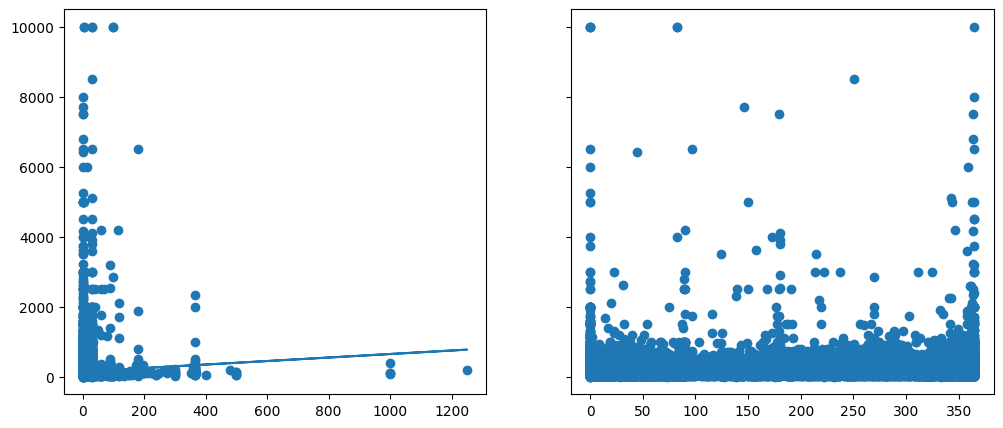

In [54]:
import numpy as np 

#O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

fig, ((ax1,ax2)) = plt.subplots(1,2,sharey=True,figsize=(12,5))
ax1.scatter(df['minimo_noites'],
            df['price']);
m, b = np.polyfit(df['minimo_noites'],
                  df['price'], 1)
ax1.plot(df['minimo_noites'],
         m*df['minimo_noites'] + b);

ax2.scatter(df['disponibilidade_365'],
            df['price']);
m, b = np.polyfit(df['disponibilidade_365'],
                  df['price'], 1)
ax2.plot(df['disponibilidade_365'], 
         m*df['disponibilidade_365'] + b);

In [55]:

y = df['price']
df['intercepto'] = 1 
x = df[['intercepto',
        'minimo_noites',
        'disponibilidade_365']]

modelo = sm.OLS(y , x)
resultado = modelo.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     189.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.51e-82
Time:                        22:41:51   Log-Likelihood:            -3.3719e+05
No. Observations:               48894   AIC:                         6.744e+05
Df Residuals:                   48891   BIC:                         6.744e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercepto            134.2164    

**Interferência do número mínimo de noites e a disponibilidade ao longo do ano** 

Considerações:

**R2**: 0.008 - Não há explicaçao do preço (target) pelas variáveis explicativas.

**Intercepto ou $\beta_0$**: Preço médio do valor do imóvel sem minimo_noites e disponibilidade_365 iguais a 0 é de `R$4.056,06`.<br>
**$\beta_1$** x minimo_noites: Cada noite adicional, mantendo a disponibilidade_365 constante, gera um aumento médio de `R$0,37`.<br>
**$\beta_2$** x disponibilidade_364: Cada dia adicional de disponibilidade, mantendo o minimo_noites constante, gera um aumento médio de `R$0,14`.

In [56]:
#Existe algum padrão no texto do nome do local para lugares de mais alto valor?
from collections import Counter

def extrair_palavras(texto):
    palavras = re.sub("[^a-zA-Z]", " ", texto).lower().split()
    return palavras

preco_baixo = df[df['price'] <= 100]
preco_medio = df[(df['price'] > 100) & (df['price'] <= 200)]
preco_alto = df[df['price'] > 200]

palavras_baixo = Counter()
preco_baixo['nome'].dropna().apply(lambda x: palavras_baixo.update(extrair_palavras(x)))

palavras_medio = Counter()
preco_medio['nome'].dropna().apply(lambda x: palavras_medio.update(extrair_palavras(x)))

palavras_alto = Counter()
preco_alto['nome'].dropna().apply(lambda x: palavras_alto.update(extrair_palavras(x)))

top_palavras_baixo = palavras_baixo.most_common(10)
top_palavras_medio = palavras_medio.most_common(10)
top_palavras_alto = palavras_alto.most_common(10)

top_palavras_baixo, top_palavras_medio, top_palavras_alto

([('in', 9320),
  ('room', 8919),
  ('private', 5375),
  ('bedroom', 4236),
  ('cozy', 3308),
  ('apartment', 2626),
  ('brooklyn', 2389),
  ('to', 2323),
  ('manhattan', 1888),
  ('spacious', 1814)],
 [('in', 5296),
  ('apartment', 3024),
  ('bedroom', 2737),
  ('studio', 2286),
  ('apt', 2142),
  ('br', 1696),
  ('private', 1588),
  ('east', 1512),
  ('the', 1511),
  ('cozy', 1472)],
 [('in', 2182),
  ('br', 1448),
  ('bedroom', 1336),
  ('apartment', 1112),
  ('apt', 935),
  ('luxury', 738),
  ('village', 728),
  ('the', 727),
  ('loft', 662),
  ('w', 662)])

**Padrões no Texto do Nome do Local para Lugares de Mais Alto Valor**

Considerações:

Nomes de aluguéis em faixas de preço mais elevadas frequentemente incluem palavras como "luxury", "village" e "loft", sugerindo que esses termos podem estar associados a propriedades mais caras ou desejáveis.
Diferenças nos Termos Usados: Enquanto propriedades mais baratas tendem a usar palavras como "cozy", "private", e "bedroom", propriedades mais caras usam termos que indicam luxo ou localizações exclusivas.

**3. Explique como você faria a previsão do preço a partir dos dados.
Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**

Para fazer uma previsão de preço a partir dos dados fornecidos, utilizei modelos de machine learning. 
Selecionei as seguintes variáveis:'bairro_group', 'room_type', 'minimo_noites', 'calculado_host_listings_count', 'disponibilidade_365'.
A variável dependente é: price

Problema: De regressão, pois precisamos prever um valor numérico específico. Neste caso, o objetivo é prever um valor contínuo - o preço do aluguel.

Utilizei como Medida de Performance Escolha de Métricas:
RMSE (Root Mean Squared Error) e o R² (Coeficiente de Determinação).

In [57]:
# Tratamento dos dados
colunas_para_remover = ['nome', 'id', 'host_id', 'ultima_review', 'host_name', 'latitude', 'longitude', 
                        'bairro', 'numero_de_reviews', 'reviews_por_mes']
df.drop(colunas_para_remover, axis=1, inplace=True)
df.head()

,bairro_group,room_type,price,minimo_noites,calculado_host_listings_count,disponibilidade_365,intercepto
0,Manhattan,Entire home/apt,225,1,2,355,1
1,Manhattan,Private room,150,3,1,365,1
2,Brooklyn,Entire home/apt,89,1,1,194,1
3,Manhattan,Entire home/apt,80,10,1,0,1
4,Manhattan,Entire home/apt,200,3,1,129,1


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = df.drop('price', axis=1)
y = df['price']

# One-hot encoding para variáveis categóricas e normalização para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['minimo_noites', 'calculado_host_listings_count', 'disponibilidade_365']),
        ('cat', OneHotEncoder(), ['bairro_group', 'room_type'])
    ])


X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((39115, 11), (9779, 11), (39115,), (9779,))

In [59]:
pip install xgboost

You should consider upgrading via the '/Users/xanaraquelortolan/Library/Mobile Documents/com~apple~CloudDocs/meu_git/meu_git/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


modelos = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "Floresta Aleatória": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

resultados = {}


for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados[nome] = {'RMSE': rmse, 'R²': r2}

resultados

{'Regressão Linear': {'RMSE': 212.6900589141714, 'R²': 0.09355594021834612},
 'Árvore de Decisão': {'RMSE': 238.38517530134433, 'R²': -0.13868896554308963},
 'Floresta Aleatória': {'RMSE': 221.8273167875361, 'R²': 0.014000542014000583},
 'XGBoost': {'RMSE': 220.83854037549534, 'R²': 0.022770969208626757}}

**Considerações**

Nenhum dos modelos apresentou um desempenho excepcional, indicando que pode haver fatores adicionais influenciando o preço que não estão sendo capturados pelos modelos atuais ou que o dataset pode requerer mais processamento e engenharia de recursos.
Entre os modelos testados, a Regressão Linear e a Floresta Aleatória mostraram resultados ligeiramente melhores em termos de RMSE e R², embora ainda não ideais.

**4. Supondo um apartamento com as seguintes características:
{'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'price': 225, 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}
Qual seria a sua sugestão de preço?**

In [61]:

novo_apartamento = {
    'bairro_group': 'Manhattan',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

novo_apartamento_df = pd.DataFrame([novo_apartamento])
novo_apartamento_processed = preprocessor.transform(novo_apartamento_df)
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
preco_previsto = modelo_linear.predict(novo_apartamento_processed)
preco_previsto[0]

285.4140625

CONCLUSÕES:

Hipóteses de Negócio:

Embora tenha-se percebi que as variáveis apresentadas não possuem muita influencia no preço dos imóveis, podemos destacar algumas considerações:

1. Bairros mencionados frequentement
2. Propriedades que podem ser descritas com palavras como "luxury", "village" ou "loft" podem justificar preços de aluguel mais altos e podem ser investimentos atraentes. 
e, como "Manhattan e "Brooklyn", podem ser locais de alta demanda, sugerindo um bom potencial de investimento. 
3. Usar termos populares como "apartment" na descrição dos aluguéis pode aumentar seu apelo, independentemente da faixa de preço. 
4. Investir em uma mistura de propriedades de luxo e opções mais acessíveis pode ser uma estratégia para alcançar diferentes segmentos de mercado.